# Stroke Prediction Project

## Introduction

1. According to the World Health Organization (WHO), stroke is the second leading cause of death   worldwide, responsible for approximately 11% of all deaths.
2. A stroke is a medical emergency and prompt treatment is crucial. Early action can reduce brain damage and other complications.
3. This data set is used to predict whether a patient is likely to have a stroke based on input parameters such as gender, age, various diseases, and smoking status. Each row of data provides relevant information about the patient.

## Objective of the project

1. Understand what are the reasons that cause a stroke in people.
2. Visualize the relationships between various healthy and unhealthy habits for stroke.
3. Predict the probability of stroke with the best model and hyperfit parameters.

## Features

1. stroke: 1 if the patient had a stroke or 0 if not. (Target Variable)

2. id: Unique identifier.
3. gender: "Male", "Female" or "Other".
4. age:: Age of the patient.
5. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension.
6. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease.
7. ever_married: "No" or "Yes".
8. work_type: "Children", "Govt_jov", "Never_worked", "Private" or "Self-employed".
9. Residence_type: "Rural" or "Urban".
10. avg_glucose_level: Average glucose level in blood.
11. bmi: Body mass index.
12. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown".

## Assumptions 

1. Age is a significant risk factor for the development of a Stroke    🟢
2. Higher BMI lead to higher risk of having stroke                     🟢
3. Smokers have higher risk of having stroke                           🟡 
4. Higher glucose level lead to higher risk of having stroke           🟢
5. Patients who live in rural area have higher risk of stroke compared
   to patients who live in urban area                                  🔴 

🟢 = Proved
🟡 = Not proven
🔴 = Invalidated

## Import libraries / dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [5]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
data.shape

(5110, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Data cleaning 

In [8]:
data.isnull().sum()
#201 NA values in BMI column

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
#Replace missing values with median values 
data['bmi'].fillna(value=data['bmi'].median(),inplace=True)

In [10]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### Remove ID column

In [11]:
data = data.drop("id", axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


#### Convert data into numerical variables for exploration and analysis

In [12]:
#Convert non numerical variables into dummies 
#data = pd.get_dummies(data, ["gender","ever_married","work_type","Residence_type","smoking_status"])

#### Check the balance of target variable: stroke

In [13]:
data["stroke"].value_counts()
#Imbalance data

0    4861
1     249
Name: stroke, dtype: int64

## EDA

In [14]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


0    4861
1     249
Name: stroke, dtype: int64


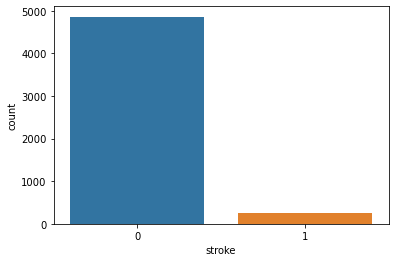

In [15]:
sns.countplot(data=data, x='stroke')
print(data.stroke.value_counts())

### 1. Categorical variables analysis

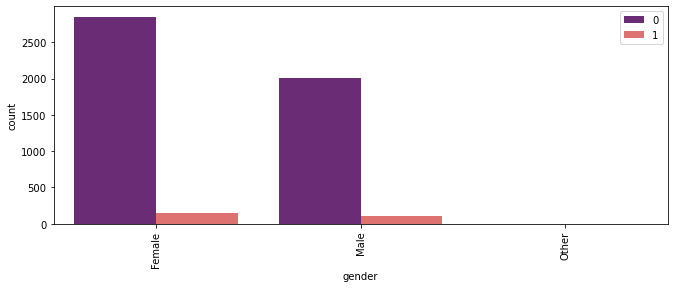

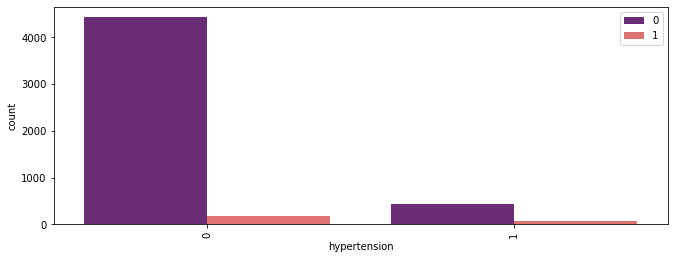

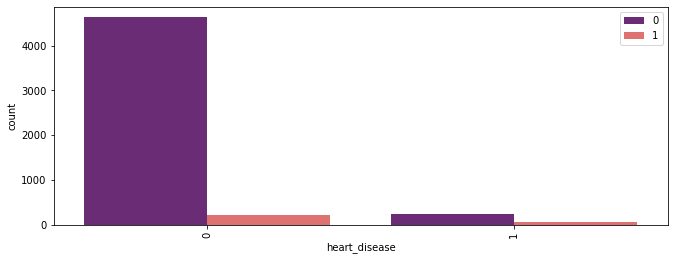

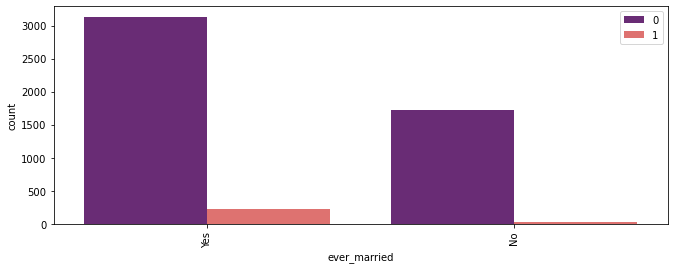

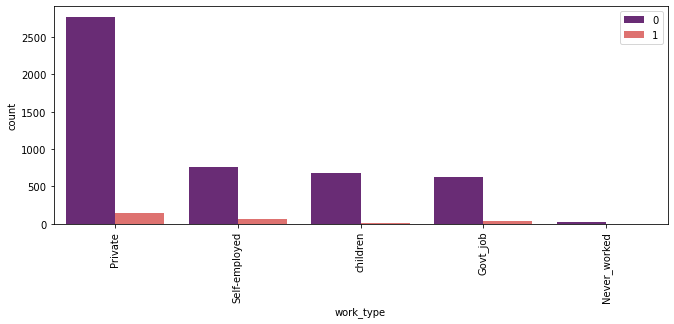

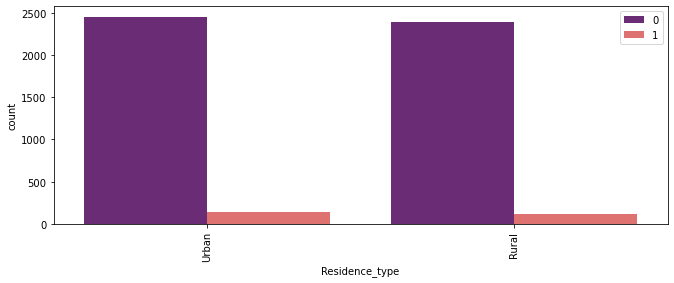

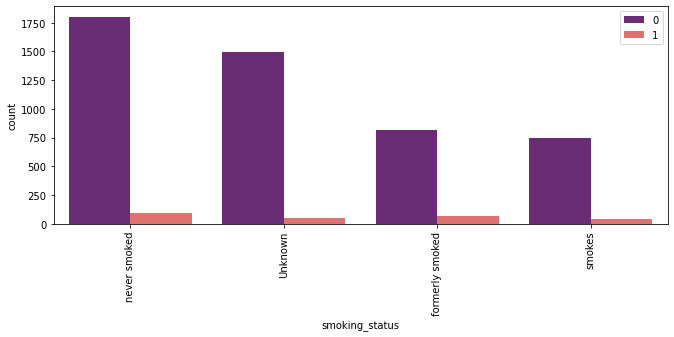

In [16]:
cat_variables = ["gender","hypertension","heart_disease",'ever_married','work_type','Residence_type','smoking_status']
for i in cat_variables:
    fig_dims = (11, 4)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.countplot(x=i, hue="stroke", ax=ax, data=data,palette="magma",order=data[i].value_counts().index)
    plt.xticks(rotation=90)
    plt.legend(loc='upper right')
    plt.show()

### 2. Numerical variables analysis

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

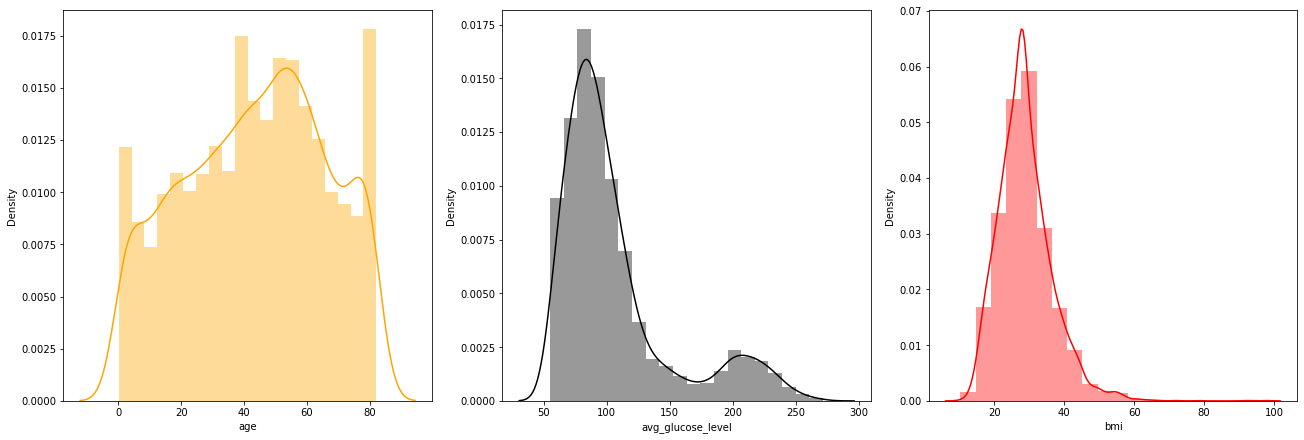

In [26]:
f,ax=plt.subplots(1,3,figsize=(18,6),constrained_layout = True, squeeze=False)
sns.distplot(data["age"], bins=20,ax=ax[0,0],color='orange');

sns.distplot(data["avg_glucose_level"],bins=20,ax=ax[0,1],color='black');

sns.distplot(data["bmi"],bins=20,ax=ax[0,2],color='red');

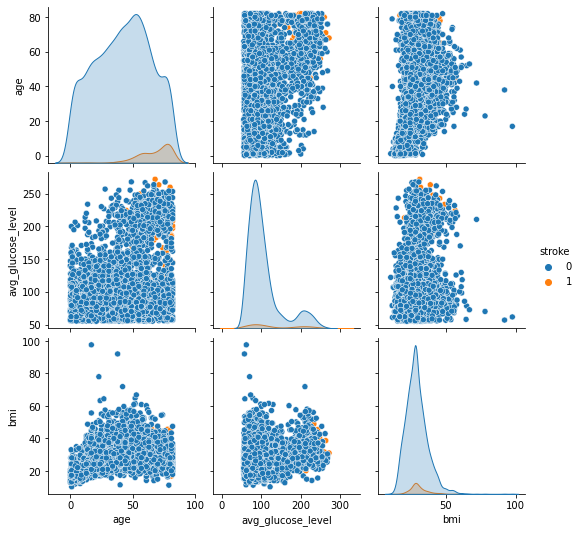

In [27]:
sns.pairplot(data[["age","avg_glucose_level","bmi","stroke"]],hue="stroke")

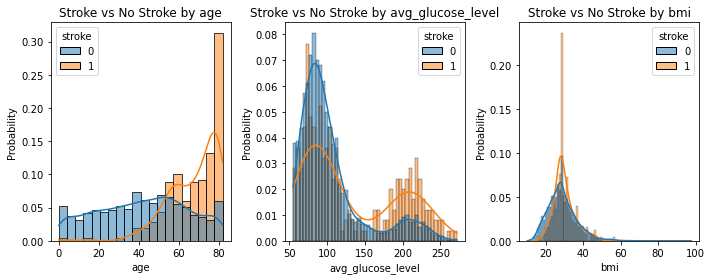

In [28]:
num_list = ['age', 'avg_glucose_level', 'bmi']
plt.figure(figsize=(10,4))
for i in range(len(num_list)):
    plt.subplot(1,3,i+1)
    sns.histplot(data=data,x=num_list[i], hue='stroke', kde=True, stat="probability", common_norm=False)
    plt.title('Stroke vs No Stroke by {}'.format(num_list[i]))
plt.tight_layout()

#### Age: The chances of getting stroke under 40 is slim, it is getting higher pass 50 and the chances of stroke is very high in the age og 70 - 80
#### Average glucose level: When glucose level pass 150, higher chances to have stroke

### 3. Heatmap to check correlation

<AxesSubplot:>

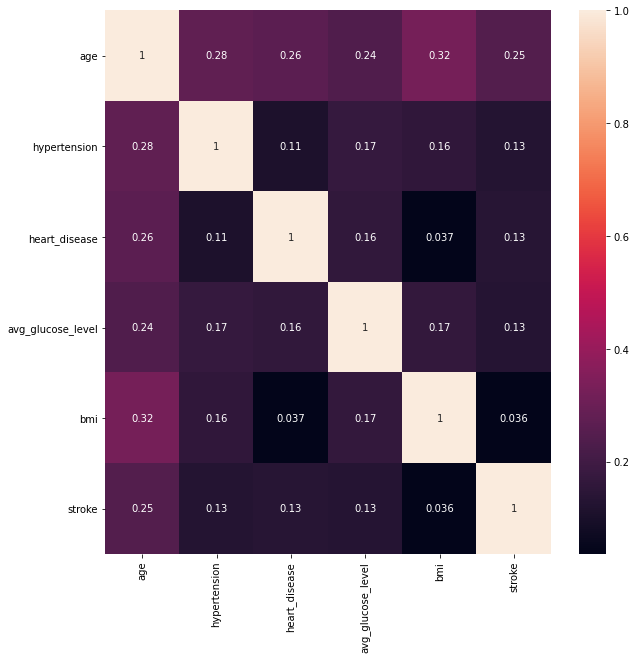

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

## Normalization

In [31]:
data=pd.get_dummies(data,["gender","ever_married","work_type","Residence_type","smoking_status"])

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
# Apply normalization for better analysis
transformer = MinMaxScaler()
def scaling(columns):
    return transformer.fit_transform(data[columns].values.reshape(-1,1))

columns_to_be_scaled = ['age','bmi','avg_glucose_level']
for i in columns_to_be_scaled:
    data[i] = scaling(i)
    
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.816895,0,1,0.801265,0.301260,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,0.743652,0,0,0.679023,0.203895,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,0.975586,0,1,0.234512,0.254296,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,0.597168,0,0,0.536008,0.276060,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,0.963379,1,0,0.549349,0.156930,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


## Split data into train and test 

In [34]:
# Import Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import cross_val_score

#### Splitting data into training (75%) and testing (25%)

In [35]:
X=data.drop(["stroke"], axis=1)
y=data["stroke"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=123)

## Logistric regression 

In [36]:
#Fit in the model
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [37]:
#Prediciton
prediction_log = logmodel.predict(X_test)

In [38]:
#Classification report for logistic regression
print(classification_report(y_test,prediction_log))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1220
           1       1.00      0.02      0.03        58

    accuracy                           0.96      1278
   macro avg       0.98      0.51      0.51      1278
weighted avg       0.96      0.96      0.93      1278



In [39]:
#Confusion metrix
print(confusion_matrix(y_test,prediction_log))

[[1220    0]
 [  57    1]]


In [40]:
#Accuracy = 0.95
log_acc=((1220+1)/(1220+57+1))
log_acc

0.9553990610328639

In [41]:
scores = cross_val_score(logmodel, X_train, y_train, cv=5)
print("Mean cross-validation score for logistic regression model: %.2f" % scores.mean())

Mean cross-validation score for logistic regression model: 0.95


## Decision tree

In [42]:
#Fit in the model
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
#prediction
dtree_prediction = dtree.predict(X_test)

In [44]:
#Classification report
print(classification_report(y_test, dtree_prediction))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1220
           1       0.20      0.24      0.22        58

    accuracy                           0.92      1278
   macro avg       0.58      0.60      0.59      1278
weighted avg       0.93      0.92      0.93      1278



In [45]:
#Confusion metrix
print(confusion_matrix(y_test,dtree_prediction))

[[1164   56]
 [  44   14]]


In [46]:
#Accuracy = 92
print((1161+13)/(1161+13+59+45))

0.918622848200313


In [47]:
scores = cross_val_score(dtree, X_train, y_train, cv=5)
print("Mean cross-validation score for decision tree model: %.2f" % scores.mean())

Mean cross-validation score for decision tree model: 0.91


## Random forest

In [48]:
rf_model = RandomForestClassifier(n_estimators=300)

In [49]:
#fit it to the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [50]:
#prediction
rf_prediction = rf_model.predict(X_test)

In [51]:
#Classification report
print(classification_report(y_test, rf_prediction))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1220
           1       0.50      0.03      0.06        58

    accuracy                           0.95      1278
   macro avg       0.73      0.52      0.52      1278
weighted avg       0.94      0.95      0.94      1278



In [52]:
#Confussion matrix
print(confusion_matrix(y_test, rf_prediction))

[[1218    2]
 [  56    2]]


In [53]:
#Accuracy = 95
print((1217+2)/(1217+2+3+56))

0.9538341158059468


In [54]:
scores = cross_val_score(dtree, X_train, y_train, cv=5)
print("Mean cross-validation score for random forest model: %.2f" % scores.mean())

Mean cross-validation score for random forest model: 0.91


## Compare the accuracy of each model

In [59]:
LOG=print("Logistic Regression accuracy score:", accuracy_score(prediction_log,y_test))
DEC=print("Decision Tree accuracy score:", accuracy_score(dtree_prediction, y_test))
RF=print("Random Forest accuracy score :",accuracy_score(rf_prediction,y_test))

Logistic Regression accuracy score: 0.9553990610328639
Decision Tree accuracy score: 0.9217527386541471
Random Forest accuracy score : 0.9546165884194053


##### Logistic Regression model has the highest accuracy score